In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Wholesale_customers_data.csv')  #Läser in csv-filen

In [3]:
df.head()  #Visar de 5 första raderna

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.dtypes  #Visar vilka datatyper det är

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
#pd.set_option('display.max_rows', None) #Warning: shows ALL rows
#print(df)

In [6]:
round(df.describe(),1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.0,440.0,440.0,440.0,440.0,440.0,440.0,440.0
mean,1.3,2.5,12000.3,5796.3,7951.3,3071.9,2881.5,1524.9
std,0.5,0.8,12647.3,7380.4,9503.2,4854.7,4767.9,2820.1
min,1.0,1.0,3.0,55.0,3.0,25.0,3.0,3.0
25%,1.0,2.0,3127.8,1533.0,2153.0,742.2,256.8,408.2
50%,1.0,3.0,8504.0,3627.0,4755.5,1526.0,816.5,965.5
75%,2.0,3.0,16933.8,7190.2,10655.8,3554.2,3922.0,1820.2
max,2.0,3.0,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


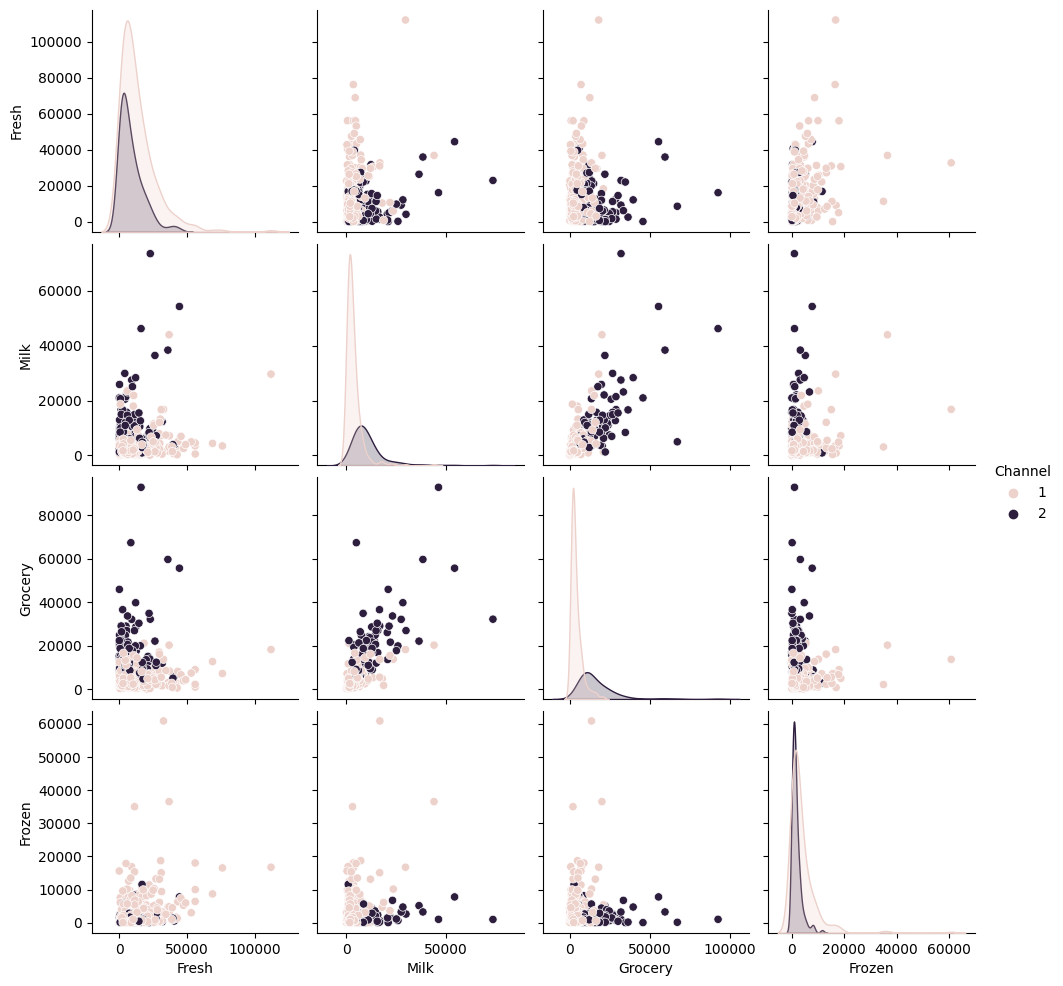

In [7]:
#visualiserar sambandet mellan olika varor, sålda på resturang/cafe respektive butik
sns.pairplot(df.drop(labels=['Region', 'Detergents_Paper', 'Delicassen'], axis=1), hue='Channel')


In [8]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [9]:
#Normailiserar datan
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_norm)

     Channel  Region     Fresh      Milk   Grocery    Frozen   
0        1.0     1.0  0.112940  0.130727  0.081464  0.003106  \
1        1.0     1.0  0.062899  0.132824  0.103097  0.028548   
2        1.0     1.0  0.056622  0.119181  0.082790  0.039116   
3        0.0     1.0  0.118254  0.015536  0.045464  0.104842   
4        1.0     1.0  0.201626  0.072914  0.077552  0.063934   
..       ...     ...       ...       ...       ...       ...   
435      0.0     1.0  0.264829  0.163338  0.172715  0.215469   
436      0.0     1.0  0.349761  0.018736  0.008202  0.073713   
437      1.0     1.0  0.129543  0.210136  0.325943  0.006771   
438      0.0     1.0  0.091727  0.026224  0.024025  0.016649   
439      0.0     1.0  0.024824  0.022371  0.027022  0.000657   

     Detergents_Paper  Delicassen  
0            0.065427    0.027847  
1            0.080590    0.036984  
2            0.086052    0.163559  
3            0.012346    0.037234  
4            0.043455    0.108093  
..             

In [10]:
#Delar upp datasetet i training och test
X_train, X_test, y_train, y_test = train_test_split(df[['Fresh', 'Milk', 
                                                        'Grocery', 'Frozen']],
                                                    df['Channel'], random_state=123, test_size=0.33)

In [11]:
#visar hur datat delats upp
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (294, 4)
y_train shape: (294,)
X_test shape: (146, 4)
y_test shape: (146,)


In [12]:
#Skriver ut träningsdata
print(X_train, y_train)

     Fresh   Milk  Grocery  Frozen
12   31714  12319    11757     287
30   18815   3610    11107    1148
144  18827   3677     1988     118
373  15076   6257     7398    1504
191  13624    295     1381     890
..     ...    ...      ...     ...
230  11072   5989     5615    8321
98     503    112      778     895
322  15881    713     3315    3703
382  34454   7435     8469    2540
365   4692   6128     8025    1619

[294 rows x 4 columns] 12     2
30     1
144    1
373    2
191    1
      ..
230    2
98     1
322    1
382    1
365    2
Name: Channel, Length: 294, dtype: int64


In [13]:
#Väljer antalet K 
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# skapar en prediction array för test
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 1 2 2 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 1 1
 2 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 2 1 1 1 1 1
 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 2 2 2 1 1 2 1 1 2 2 1 1 2 1 2 1 1 2]


In [16]:
#Gör en confusion matrix 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

print (confusion_matrix)

Predicted   1   2
Actual           
1          96   6
2           6  38


In [17]:
pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)], 
          ignore_index=False, axis=1)

,Fresh,Milk,Grocery,Frozen,Channel,Predicted
13,21217,6208,14982,3095,2,2
299,444,879,2060,264,1,1
142,37036,7152,8253,2995,1,1
202,25203,11487,9490,5065,1,2
170,260,8675,13430,1116,2,2
...,...,...,...,...,...,...
185,8170,6448,1139,2181,1,1
38,4591,15729,16709,33,2,2
223,2790,2527,5265,5612,2,1
148,5924,584,542,4052,1,1


In [18]:
#  Compute the ACCURACY measurement of this model 
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.92
